# AdaBoost

**Algorithm**


1. Init data weights $\{w_n\}$ to $\frac{1}{N}$
1. for m = 1 to M do
1.   &emsp;&emsp;fit a classifier $y_{m}(x)$ by minimizing weighted error function $J_{m}$:
1.   &emsp;&emsp;$J_{m}=\displaystyle\sum_{n=1}^{N}w_n^{(m)}1[y_m(x_n) \neq t_n]$
1.   &emsp;&emsp;compute $\epsilon_{m}=\frac{J_m}{\displaystyle\sum_{n=1}^{N} w_n^{(m)}}$
1.   &emsp;&emsp;evaluate $\alpha_m=\log\left(\frac{1-\epsilon_m}{\epsilon_m}\right)$
1.   &emsp;&emsp;update the data weights: $w_n^{(m+1)}=w_n^{(m)}exp\{\alpha_m1[y_m(x_n) \neq t_n]\}$
1. end for
1. Make predictions using the final model: $Y_{M}(x)=sign\left(\displaystyle\sum_{m=1}^{M} \alpha_{m}y_{m}(x) \right)$


- $w$: 权重
- $w_n$: 第 n 条记录的权重
- $N$: 数据集总记录数
- $m$: 分类器
- $M$: 分类器的总数
- $w_n^{(m)}$: 第 m 个分类器中第 n 条记录的权重
- $y_m{(x)}$: 第 m 个分类器的预测结果集
- $y_m(x_n)$: 第 m 个分类器对第 n 条记录的预测结果
- $1[y_m(x_n) \neq t_n]$: 当实际结果与预测结果不一致是取1，否则取0
- $sign$: 小于0返回-1，否则返回1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

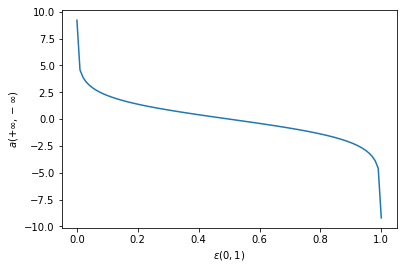

In [2]:
x = np.linspace(0.0001, 0.9999, 100)
y = np.log((1-x)/x)
plt.xlabel('$\epsilon (0, 1)$')
plt.ylabel('$a (+\infty, -\infty)$')
plt.plot(x, y)

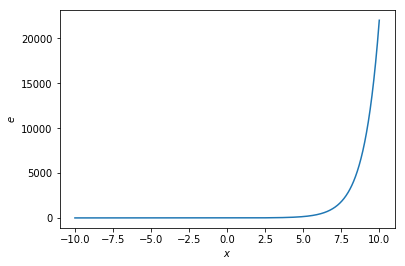

In [3]:
x = np.linspace(-10, 10, 1000)
y = np.exp(x)
plt.xlabel('$x$')
plt.ylabel('$e$')
plt.plot(x, y)

In [86]:
# 构建数据集
df = pd.DataFrame({
    'x': np.arange(10),
    'y': [1,1,1,-1,-1,-1,1,1,1,-1]
})
df

,x,y
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
5,5,-1
6,6,1
7,7,1
8,8,1
9,9,-1


In [87]:
# 添加权重
df['w'] = 1
# 预测结果
df['p'] = np.nan
# 预测结果与实际值相等显示0 否则显示1
df['j'] = np.nan
df

,x,y,w,p,j
0,0,1,1,NaN,NaN
1,1,1,1,NaN,NaN
2,2,1,1,NaN,NaN
3,3,-1,1,NaN,NaN
4,4,-1,1,NaN,NaN
5,5,-1,1,NaN,NaN
6,6,1,1,NaN,NaN
7,7,1,1,NaN,NaN
8,8,1,1,NaN,NaN
9,9,-1,1,NaN,NaN


In [67]:
res = []
for i in np.arange(1, df.shape[0]):
    df.loc[:i, 'p'] = 1
    df.loc[i:, 'p'] = -1
    df['j'] = (df['y'] != df['p']).astype(np.int)
    res.append((i, (df['w'] * df['j']).sum()))
j = min(res, key=lambda x: x[1])
j

(3, 0.30000000000000004)

In [68]:
epsilon = j[1]/df['w'].sum()
epsilon

0.30000000000000004

In [69]:
alpha = np.log((1-epsilon)/epsilon)
alpha

0.8472978603872034

In [70]:
next_w = df['w'] * np.exp(alpha * df['j'])
next_w

0    0.100000
1    0.100000
2    0.100000
3    0.233333
4    0.233333
5    0.233333
6    0.100000
7    0.100000
8    0.100000
9    0.100000
dtype: float64

In [89]:
def compute_weights(p_df):
    df = p_df.copy()
    arr = []
    for i in np.arange(1, df.shape[0]):
        df.loc[:i, 'p'] = 1
        df.loc[i:, 'p'] = -1
        df['j'] = (df['y'] != df['p']).astype(np.int)
        arr.append((i, (df['w'] * df['j']).sum()))
    j = min(res, key=lambda x: x[1])
    epsilon = j[1]/df['w'].sum()
    alpha = np.log((1-epsilon)/epsilon)
    df['w'] = df['w'] * np.exp(alpha * df['j'])
    return df, j, arr

def compute_weights2(p_df):
    df = p_df.copy()
    arr = []
    for i in np.arange(1, df.shape[0]):
        df.loc[:i, 'p'] = 1
        df.loc[i:, 'p'] = -1
        df['j'] = (df['y'] != df['p']).astype(np.int)
        arr.append((i, (df['w'] * df['j']).sum()))
    j = min(res, key=lambda x: x[1])
    epsilon = j[1]/df['w'].sum()
    d = np.sqrt((1-epsilon)/epsilon)
    alpha = np.log((1-epsilon)/epsilon)
    df.loc[df['j'] != 0, 'w'] = df.loc[df['j'] != 0, 'w'] * d
    df.loc[df['j'] == 0, 'w'] = df.loc[df['j'] == 0, 'w'] / d
    return df, j, arr

def compute_weights3(p_df, threshold):
    df = p_df.copy()
    df.loc[:threshold, 'p'] = 1
    df.loc[threshold:, 'p'] = -1
    df['j'] = (df['y'] != df['p']).astype(np.int)
    j = (df['w'] * df['j']).sum()
    epsilon = j / df['w'].sum()
    d = np.sqrt((1-epsilon)/epsilon)
    alpha = np.log((1-epsilon)/epsilon) / 2
    df.loc[df['j'] != 0, 'w'] = df.loc[df['j'] != 0, 'w'] * d
    df.loc[df['j'] == 0, 'w'] = df.loc[df['j'] == 0, 'w'] / d
    return df, epsilon, d, alpha

In [90]:
df

,x,y,w,p,j
0,0,1,1,NaN,NaN
1,1,1,1,NaN,NaN
2,2,1,1,NaN,NaN
3,3,-1,1,NaN,NaN
4,4,-1,1,NaN,NaN
5,5,-1,1,NaN,NaN
6,6,1,1,NaN,NaN
7,7,1,1,NaN,NaN
8,8,1,1,NaN,NaN
9,9,-1,1,NaN,NaN


In [93]:
df1, epsilon, d, alpha = compute_weights3(df, 3)
print(df1)
print(f'epsilon={epsilon}, d={d}, alpha={alpha}')

   x  y         w    p  j
0  0  1  0.654654  1.0  0
1  1  1  0.654654  1.0  0
2  2  1  0.654654  1.0  0
3  3 -1  0.654654 -1.0  0
4  4 -1  0.654654 -1.0  0
5  5 -1  0.654654 -1.0  0
6  6  1  1.527525 -1.0  1
7  7  1  1.527525 -1.0  1
8  8  1  1.527525 -1.0  1
9  9 -1  0.654654 -1.0  0
epsilon=0.3, d=1.5275252316519468, alpha=0.42364893019360184


In [96]:
df2, epsilon, d, alpha = compute_weights3(df1, 8)
print(df2)
print(f'epsilon={epsilon}, d={d}, alpha={alpha}')

   x  y         w    p  j
0  0  1  0.513553  1.0  0
1  1  1  0.513553  1.0  0
2  2  1  0.513553  1.0  0
3  3 -1  0.834523  1.0  1
4  4 -1  0.834523  1.0  1
5  5 -1  0.834523  1.0  1
6  6  1  1.198289  1.0  0
7  7  1  1.198289  1.0  0
8  8  1  1.947220 -1.0  1
9  9 -1  0.513553 -1.0  0
epsilon=0.3809523809523809, d=1.2747548783981963, alpha=0.24275390789085055


In [97]:
df3, epsilon, d, alpha = compute_weights3(df2, 5)
print(df3)
print(f'epsilon={epsilon}, d={d}, alpha={alpha}')

   x  y         w    p  j
0  0  1  0.740920  1.0  0
1  1  1  0.740920  1.0  0
2  2  1  0.740920  1.0  0
3  3 -1  0.578432  1.0  1
4  4 -1  0.578432  1.0  1
5  5 -1  1.203995 -1.0  0
6  6  1  0.830568 -1.0  1
7  7  1  0.830568 -1.0  1
8  8  1  1.349674 -1.0  1
9  9 -1  0.740920 -1.0  0
epsilon=0.6754807692307693, d=0.6931284486033921, alpha=-0.3665399454476583
